In [36]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units
from scipy.optimize import curve_fit

In [2]:
m_e = const.m_e.cgs
e_charge= const.e
speed_light = const.c.cgs
h_planck = const.h.cgs
nu = 1
sigma_T = const.sigma_T.cgs

In [3]:
m_e = const.m_e.cgs
e_charge= const.e
speed_light = const.c.cgs
h_planck = const.h.cgs
nu = 1

## Part A

In [4]:
def calculation_a(epi_insert, theta): 
    const1 = epi_insert/(m_e.value*speed_light.value**2)
    const2 = (e_charge.value**4/(m_e.value**2*speed_light.value**4))  #r_0**2
    const_epi = epi_insert/(1+const1*(1-np.cos(theta)))
    function = (const2/2)*(const_epi**2/epi_insert**2)*((epi_insert/const_epi)+(const_epi/epi_insert)-np.sin(theta)**2)

    return function

In [5]:
theta = np.arange(-np.pi, np.pi, 2*np.pi/1000)
ev_to_ergs = 1.602E-12
epi_1 = 3*ev_to_ergs #eV
epi_2 = 3E3*ev_to_ergs #keV
epi_3 = 1E6*ev_to_ergs #MeV
epi_4 = 100E6*ev_to_ergs #MeV

function1 = calculation_a(epi_1, theta)
function2 = calculation_a(epi_2, theta)
function3 = calculation_a(epi_3, theta)
function4 = calculation_a(epi_4, theta)

'\nThis graph shows the behavior we expect. At smaller enegeries, the particle has a higher probability of being deflected in any direction.\nAt higher energies, the particle will pass through and remain on its same trajectory. \n'

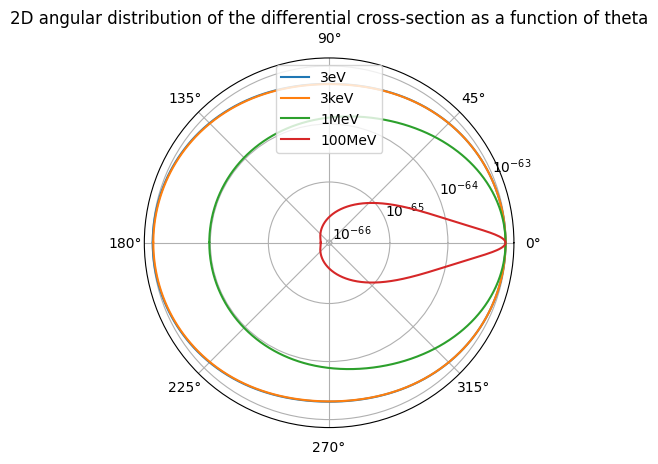

In [7]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection': 'polar'})
ax.plot(theta, function1, label = '3eV')
ax.plot(theta, function2, label = '3keV')
ax.plot(theta, function3, label = '1MeV')
ax.plot(theta, function4, label = '100MeV')
ax.set_yscale('log')
ax.legend(loc='upper center')
ax.set_title('2D angular distribution of the differential cross-section as a function of theta')

'''
This graph shows the behavior we expect. At smaller enegeries, the particle has a higher probability of being deflected in any direction.
At higher energies, the particle will pass through and remain on its same trajectory. 
'''

## Part B

In [10]:
const2 = (e_charge.value**4/(m_e.value**2*speed_light.value**4))  #r_0**2
#sigma_thompson = sigma_T  #const2*(8*np.pi)/3

#nu = np.arange(1e-2, 3E19, 1E15)
x = np.logspace(-3, 8, 100) #(h_planck.value*nu)/(m_e.value*speed_light.value)

part1 = ((1+x)/x**3)*((2*x*(1+x))/(1+2*x) - np.log(1+2*x))
part2 = (1/(2*x))*np.log(1+2*x)
part3 = (1+3*x)/(1+2*x)**2
comp_sigma = (3/4)*sigma_T.value*(part1+part2-part3)

Text(0.5, 1.0, 'Compton Scattering')

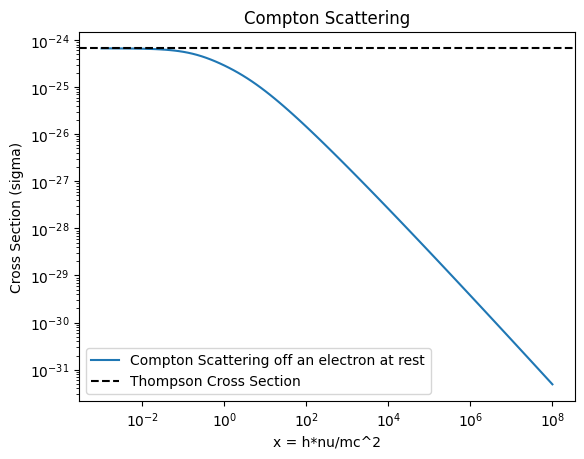

In [12]:
fig, ax = plt.subplots(1,1)
ax.plot(x, comp_sigma, label='Compton Scattering off an electron at rest')
ax.axhline(y=sigma_T.value, c='k', ls='dashed', label="Thompson Cross Section")
ax.set_ylabel('Cross Section (sigma)')
ax.set_xlabel('x = h*nu/mc^2')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_title("Compton Scattering")

## Calculate 2c

In [22]:
# I used this reference for the B field in the ISM: https://adsabs.harvard.edu/full/2004mim..proc..105T
chi = 10*np.pi/180
m_e = const.m_e.cgs
B = 5E-6 *units.erg**(1/2) * units.cm**(-3/2)#Gauss
speed_light = const.c.cgs
omega = 1E9*units.Hz*2*np.pi
e_charge= const.e.gauss
n = 1 * (units.cm**(-3))   #From class

d = (chi*m_e.value**2*speed_light.value**2*omega.value**2)/(2*np.pi*e_charge.value**3*n.value*B.value)
#d = (chi*m_e**2*speed_light**2*omega**2)/(2*np.pi*e_charge**3*n*B)
print(d)    #, d.decompose)
print(const.pc)

1.4760917017133448e+18
  Name   = Parsec
  Value  = 3.085677581491367e+16
  Uncertainty  = 0.0
  Unit  = m
  Reference = Derived from au + IAU 2015 Resolution B 2 note [4]


## Calculation 2d

In [24]:
dtdw = -(n.value*d)*(4*np.pi*e_charge.value**2)/(m_e.value*speed_light.value*omega.value**3)
#dtdw = -(n*d)*(4*np.pi*e_charge**2)/(m_e*speed_light*omega**3)
print(dtdw)

-6.317366781739689e-13


## Calculate 2e

2.3074026763081393e-12


Text(0, 0.5, 'Frequency (GHz)')

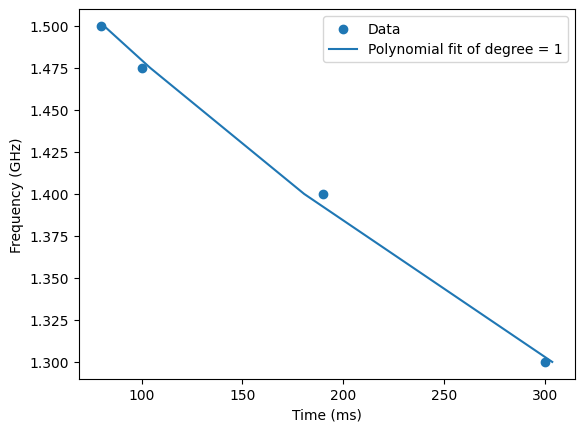

In [38]:
#Fitting for Figure 1
x_obs = np.array([80, 100, 190, 300 ])
y_obs = np.array([1.5,1.475, 1.4, 1.3])

def functA(x_arr,A1, c1): 
    return A1/(x_arr**2)+c1

parameters = curve_fit(functA,y_obs, x_obs)
a1, c1 = parameters[0]

x_calculate = functA(y_obs, a1, c1)

#Plot fitting
fig,ax = plt.subplots()
ax.scatter(x_obs,y_obs, label="Data")
ax.plot(x_calculate, y_obs, label=f'Polynomial fit of degree = {degree}')
ax.legend()
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Frequency (GHz)')

Text(0, 0.5, 'Steps of Pi')

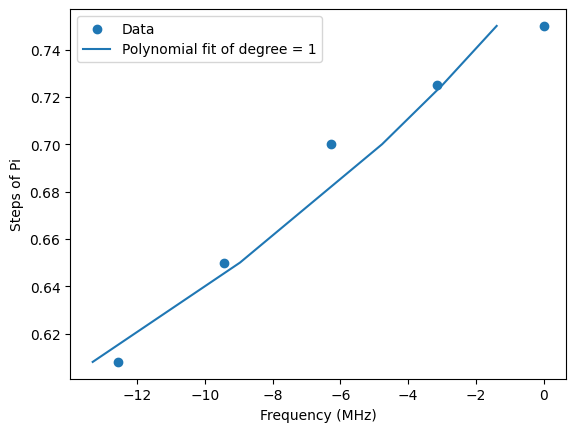

In [49]:
#Fitting for Figure 2
x_obs = np.array([750E-3, 725E-3, 700E-3, 650E-3, 608E-3])
y_obs = np.array([0, -np.pi, -2*np.pi, -3*np.pi, -4*np.pi])

def functA(x_arr,A1, c1): 
    return A1/(x_arr**2)+c1

parameters = curve_fit(functA, x_obs, y_obs)
a2, c2 = parameters[0]

y_values = functA(x_obs, a2, c2)

#Plot fitting
fig,ax = plt.subplots()
ax.scatter(y_obs, x_obs, label="Data")
ax.plot(y_values, x_obs, label=f'Polynomial fit of degree = {degree}')
ax.legend()
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('Steps of Pi')
#ax.invert_xaxis()

In [48]:
avg_B = -a2/a1*(m_e.value*speed_light.value/e_charge.value)
print(avg_B)

4.841433995675604e-10
